# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [3]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [4]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("map_box_api")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)


## Load Data

In [5]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()


neighbourhood  single_detached_house  \
year                                                        
2001               Agincourt North                   3715   
2001  Agincourt South-Malvern West                   3250   
2001                     Alderwood                   3175   
2001                         Annex                   1060   
2001             Banbury-Don Mills                   3615   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2001                         1480                 0                 1055   
2001                         1835                 0                  545   
2001                          315                 0                  470   
2001                         6090                 5                 1980   
2001                         4465                 0                  240   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2001       1295     195                          185            5   
2001        455     105                          425            0   
2001         50     185                          370            0   
2001        605     275                         3710          165   
2001        380      15                         1360            0   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2001               200388                  810                   870  
2001               203047                  806                   892  
2001               259998                  817                   924  
2001               453850                 1027                  1378  
2001               371864                 1007                  1163

- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [6]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_types = to_data.groupby("year").sum()
df = pd.DataFrame(dwelling_types)
df.drop(columns=["average_house_value", "shelter_costs_owned",
        "shelter_costs_rented"], axis=1, inplace=True)
df


single_detached_house  apartment_five_storeys_plus  movable_dwelling  \
year                                                                         
2001                 300930                       355015                75   
2006                 266860                       379400               165   
2011                 274940                       429220               100   
2016                 269680                       493270                95   

      semi_detached_house  row_house  duplex  apartment_five_storeys_less  \
year                                                                        
2001                90995      52355   23785                       116900   
2006                69430      54690   44095                       162850   
2011                72480      60355   44750                       163895   
2016                71200      61565   48585                       165575   

      other_house  
year               
2001         3040  
2006         1335  
2011         2165  
2016         2845

In [7]:
# Save the dataframe as a csv file
df.to_csv("dwelling_types.csv")


<AxesSubplot:title={'center':'Dwelling types in Toronto in 2001'}, xlabel='2001', ylabel='Dwelling Type Units'>

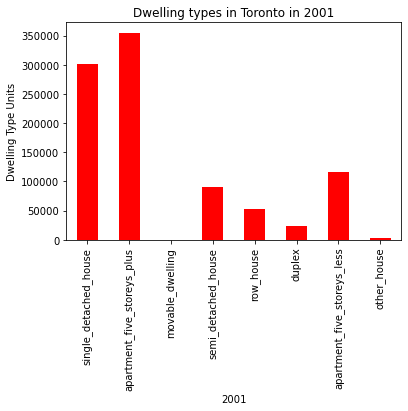

In [8]:
# Create a bar chart per year to show the number of dwelling types
# Bar chart for 2001
bar_2001 = df.loc[2001]
bar_2001.plot(kind="bar", xlabel="2001", ylabel="Dwelling Type Units",
              title="Dwelling types in Toronto in 2001", color="red")


<AxesSubplot:title={'center':'Dwelling types in Toronto in 2006'}, xlabel='2006', ylabel='Dwelling Type Units'>

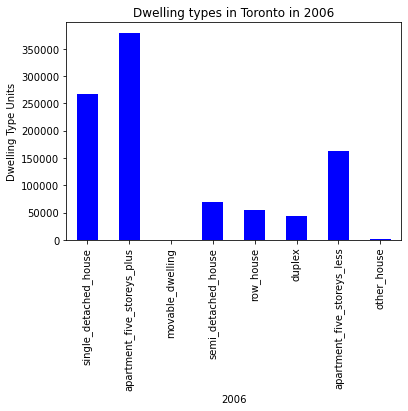

In [9]:
# Bar chart for 2006
bar_2006 = df.loc[2006]
bar_2006.plot(kind="bar", xlabel="2006", ylabel="Dwelling Type Units",
              title="Dwelling types in Toronto in 2006", color="blue")


<AxesSubplot:title={'center':'Dwelling types in Toronto in 2011'}, xlabel='2011', ylabel='Dwelling Type Units'>

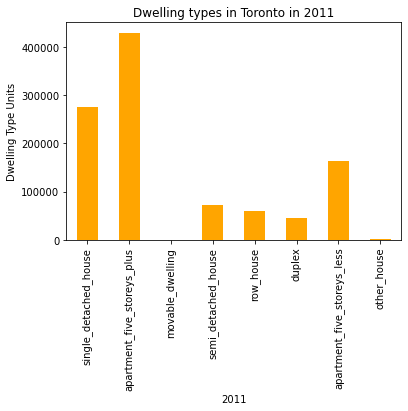

In [10]:
# Bar chart for 2011
bar_2011 = df.loc[2011]
bar_2011.plot(kind="bar", xlabel="2011", ylabel="Dwelling Type Units",
              title="Dwelling types in Toronto in 2011", color="orange")


<AxesSubplot:title={'center':'Dwelling types in Toronto in 2016'}, xlabel='2016', ylabel='Dwelling Type Units'>

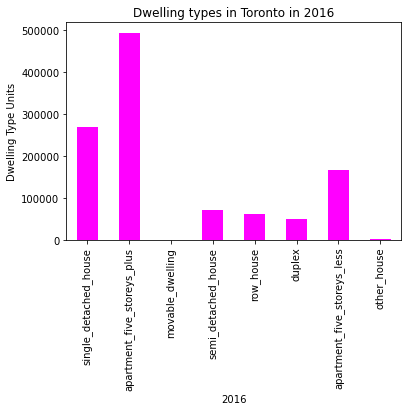

In [11]:
# Bar chart for 2016
bar_2016 = df.loc[2016]
bar_2016.plot(kind="bar", xlabel="2016", ylabel="Dwelling Type Units",
              title="Dwelling types in Toronto in 2016", color="magenta")


- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [12]:
# Calculate the average monthly shelter costs for owned and rented dwellings
df2 = pd.DataFrame(to_data.groupby("year").mean())
df2.drop(columns=["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house",
         "row_house", "duplex", "apartment_five_storeys_less", "other_house", "average_house_value"], axis=1, inplace=True)
df2


shelter_costs_owned  shelter_costs_rented
year                                           
2001           846.878571           1085.935714
2006          1316.800000            925.414286
2011          1448.214286           1019.792857
2016          1761.314286           1256.321429

<AxesSubplot:title={'center':'Average Monthly Shelter Cost for Rented Dwellings in Toronto'}, xlabel='Year', ylabel='Avg Monthly Shelter Costs'>

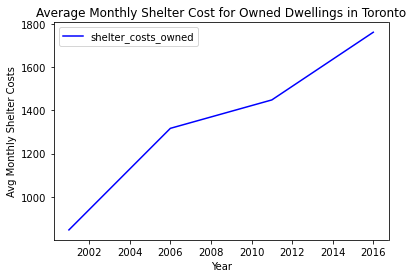

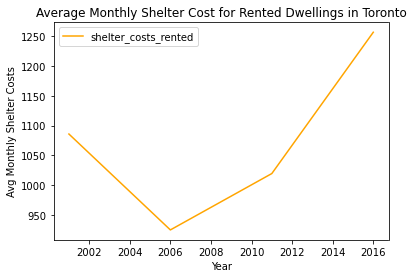

In [13]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year
# Line chart for owned dwellings
line_owned = df2.drop("shelter_costs_rented", axis=1)
line_owned.plot(kind="line", xlabel="Year", ylabel="Avg Monthly Shelter Costs",
                title="Average Monthly Shelter Cost for Owned Dwellings in Toronto", color="blue")

# Line chart for rented dwellings
line_rented = df2.drop("shelter_costs_owned", axis=1)
line_rented.plot(kind="line", xlabel="Year", ylabel="Avg Monthly Shelter Costs",
                 title="Average Monthly Shelter Cost for Rented Dwellings in Toronto", color="orange")


## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [14]:
# Calculate the average house value per year
df3 = pd.DataFrame(to_data.groupby("year").mean())
df3.drop(columns=["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house",
         "duplex", "apartment_five_storeys_less", "other_house", "shelter_costs_owned", "shelter_costs_rented"], axis=1, inplace=True)
df3


average_house_value
year                     
2001        289882.885714
2006        424059.664286
2011        530424.721429
2016        664068.328571

<AxesSubplot:title={'center':'Average House Value in Toronto'}, xlabel='Year', ylabel='Avg. House Value'>

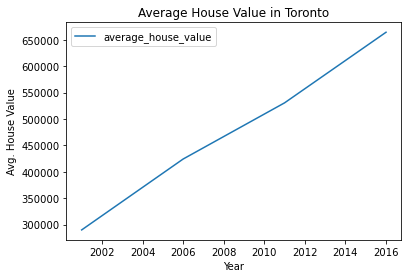

In [15]:
# Plot the average house value per year as a line chart
df3.plot(kind="line", xlabel="Year", ylabel="Avg. House Value",
         title="Average House Value in Toronto")


- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [16]:
# Create a new DataFrame with the mean house values by neighbourhood per year
df4 = pd.DataFrame(to_data)
df4.drop(columns=["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house",
         "duplex", "apartment_five_storeys_less", "other_house", "shelter_costs_owned", "shelter_costs_rented"], axis=1, inplace=True)
df4.head()


neighbourhood  average_house_value
year                                                   
2001               Agincourt North               200388
2001  Agincourt South-Malvern West               203047
2001                     Alderwood               259998
2001                         Annex               453850
2001             Banbury-Don Mills               371864

In [21]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
df4.hvplot.line(xlabel="Year", ylabel="Avg. House Value",
                title="neighbourhood", groupby="neighbourhood")

ModuleNotFoundError: No module named 'jupyter_bokeh'

:DynamicMap   [neighbourhood]

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [ ]:
# Fetch the data of all dwelling types per year
df5 = pd.read_csv(file_path, index_col=False)
df5.drop(columns=["average_house_value", "shelter_costs_owned",
         "shelter_costs_rented"], axis=1, inplace=True)
df5.head()


year                 neighbourhood  single_detached_house  \
0  2001               Agincourt North                   3715   
1  2001  Agincourt South-Malvern West                   3250   
2  2001                     Alderwood                   3175   
3  2001                         Annex                   1060   
4  2001             Banbury-Don Mills                   3615   

   apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
0                         1480                 0                 1055   
1                         1835                 0                  545   
2                          315                 0                  470   
3                         6090                 5                 1980   
4                         4465                 0                  240   

   row_house  duplex  apartment_five_storeys_less  other_house  
0       1295     195                          185            5  
1        455     105                          425            0  
2         50     185                          370            0  
3        605     275                         3710          165  
4        380      15                         1360            0

In [ ]:
df5.set_index("year").hvplot.bar(stacked=False, xlabel="Year",
                                 ylabel="Dwelling Type Units", title="neighbourhood", groupby="neighbourhood", rot=45)


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [ ]:
# Getting the data from the top 10 expensive neighbourhoods
top_10 = to_data.sort_values(
    by="average_house_value", ascending=False).head(10)
top_10


neighbourhood  single_detached_house  \
year                                                             
2016  Bridle Path-Sunnybrook-York Mills                   2275   
2011  Bridle Path-Sunnybrook-York Mills                   2285   
2016                  Forest Hill South                   1685   
2016                Lawrence Park South                   3420   
2016                Rosedale-Moore Park                   2450   
2016               St.Andrew-Windfields                   3245   
2016                          Casa Loma                    875   
2006  Bridle Path-Sunnybrook-York Mills                   2205   
2011                  Forest Hill South                   1730   
2016               Bedford Park-Nortown                   4820   

      apartment_five_storeys_plus  movable_dwelling  semi_detached_house  \
year                                                                       
2016                          590                 0                   40   
2011                          480                 0                   45   
2016                         2025                 0                   65   
2016                          925                 0                  110   
2016                         4990                 0                  485   
2016                         1745                 0                  175   
2016                         2680                 0                  265   
2006                          145                 0                   35   
2011                         1825                 0                   65   
2016                         1995                 0                   45   

      row_house  duplex  apartment_five_storeys_less  other_house  \
year                                                                
2016        230      30                           80            0   
2011        100      30                           50            0   
2016         40      70                         1050            0   
2016         35     230                         1015            5   
2016        260     345                         1505            5   
2016        540     120                          595            5   
2016        200     155                         1225            0   
2006         15      30                           10            0   
2011         45      75                         1035            0   
2016         65     315                         1260          115   

      average_house_value  shelter_costs_owned  shelter_costs_rented  
year                                                                  
2016              2124653                 2903                  2942  
2011              1697067                 2387                  2388  
2016              1664653                 2383                  1486  
2016              1522732                 2644                  1515  
2016              1522193                 2498                  1809  
2016              1390616                 2516                  1565  
2016              1365503                 2434                  1841  
2006              1356757                 2170                  2167  
2011              1329642                 1959                  1206  
2016              1295007                 2418                  1385

In [ ]:
# Plotting the data from the top 10 expensive neighbourhoods
top_10.hvplot.bar(x="neighbourhood", y="average_house_value", xlabel="Neighbourhood",
                  ylabel="Avg. House Value", title="Top 10 Expensive Neighbourhoods in Toronto", rot=45)


:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [ ]:
# Load neighbourhoods coordinates data
file_path2 = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path2, index_col="neighbourhood")
df_neighbourhood_locations.head()


lat        lon
neighbourhood                                     
Agincourt North               43.805441 -79.266712
Agincourt South-Malvern West  43.788658 -79.265612
Alderwood                     43.604937 -79.541611
Annex                         43.671585 -79.404001
Banbury-Don Mills             43.737657 -79.349718

### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [ ]:
# Calculate the mean values for each neighborhood
df6 = to_data.groupby("neighbourhood").mean()
df6.head()


single_detached_house  \
neighbourhood                                         
Agincourt North                             3435.00   
Agincourt South-Malvern West                2897.50   
Alderwood                                   2903.75   
Annex                                        751.25   
Banbury-Don Mills                           3572.50   

                              apartment_five_storeys_plus  movable_dwelling  \
neighbourhood                                                                 
Agincourt North                                   1947.50              2.50   
Agincourt South-Malvern West                      2180.00              1.25   
Alderwood                                          302.50              1.25   
Annex                                             7235.00              1.25   
Banbury-Don Mills                                 5388.75              1.25   

                              semi_detached_house  row_house  duplex  \
neighbourhood                                                          
Agincourt North                            863.75    1406.25  512.50   
Agincourt South-Malvern West               375.00     456.25  523.75   
Alderwood                                  503.75      76.25  302.50   
Annex                                     1375.00     613.75  355.00   
Banbury-Don Mills                          273.75     626.25   32.50   

                              apartment_five_storeys_less  other_house  \
neighbourhood                                                            
Agincourt North                                    547.50        10.00   
Agincourt South-Malvern West                       628.75        32.50   
Alderwood                                          502.50         1.25   
Annex                                             4605.00        83.75   
Banbury-Don Mills                                 1340.00         0.00   

                              average_house_value  shelter_costs_owned  \
neighbourhood                                                            
Agincourt North                          329811.5              1109.00   
Agincourt South-Malvern West             334189.0              1131.25   
Alderwood                                427922.5              1166.75   
Annex                                    746977.0              1692.75   
Banbury-Don Mills                        612039.0              1463.50   

                              shelter_costs_rented  
neighbourhood                                       
Agincourt North                             983.50  
Agincourt South-Malvern West                985.00  
Alderwood                                  1003.25  
Annex                                      1315.25  
Banbury-Don Mills                          1242.75

In [ ]:
# Join the average values with the neighbourhood locations
df7 = pd.concat([df6, df_neighbourhood_locations],
                axis="columns", join="inner")
df7.head()


single_detached_house  \
neighbourhood                                         
Agincourt North                             3435.00   
Agincourt South-Malvern West                2897.50   
Alderwood                                   2903.75   
Annex                                        751.25   
Banbury-Don Mills                           3572.50   

                              apartment_five_storeys_plus  movable_dwelling  \
neighbourhood                                                                 
Agincourt North                                   1947.50              2.50   
Agincourt South-Malvern West                      2180.00              1.25   
Alderwood                                          302.50              1.25   
Annex                                             7235.00              1.25   
Banbury-Don Mills                                 5388.75              1.25   

                              semi_detached_house  row_house  duplex  \
neighbourhood                                                          
Agincourt North                            863.75    1406.25  512.50   
Agincourt South-Malvern West               375.00     456.25  523.75   
Alderwood                                  503.75      76.25  302.50   
Annex                                     1375.00     613.75  355.00   
Banbury-Don Mills                          273.75     626.25   32.50   

                              apartment_five_storeys_less  other_house  \
neighbourhood                                                            
Agincourt North                                    547.50        10.00   
Agincourt South-Malvern West                       628.75        32.50   
Alderwood                                          502.50         1.25   
Annex                                             4605.00        83.75   
Banbury-Don Mills                                 1340.00         0.00   

                              average_house_value  shelter_costs_owned  \
neighbourhood                                                            
Agincourt North                          329811.5              1109.00   
Agincourt South-Malvern West             334189.0              1131.25   
Alderwood                                427922.5              1166.75   
Annex                                    746977.0              1692.75   
Banbury-Don Mills                        612039.0              1463.50   

                              shelter_costs_rented        lat        lon  
neighbourhood                                                             
Agincourt North                             983.50  43.805441 -79.266712  
Agincourt South-Malvern West                985.00  43.788658 -79.265612  
Alderwood                                  1003.25  43.604937 -79.541611  
Annex                                      1315.25  43.671585 -79.404001  
Banbury-Don Mills                          1242.75  43.737657 -79.349718

### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

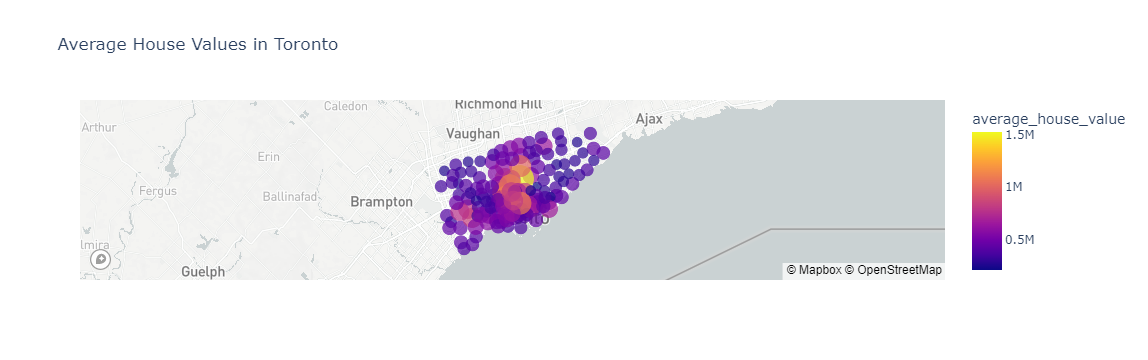

In [ ]:
# Create a scatter mapbox to analyze neighbourhood info
# px.set_mapbox_access_token(MAPBOX_API_KEY)
map1 = px.scatter_mapbox(
    df7,
    lat="lat",
    lon="lon",
    color="average_house_value",
    size="average_house_value",
    title="Average House Values in Toronto"
)
map1.show()
